In [1]:
import torch 
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd
#import tqdm as notebook_tqdm

D:\PyTorch\PyTorch_Tutorial\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import tqdm as tqdm

In [8]:
#!pip install seaborn

In [9]:
#!pip install tqdm

In [11]:
#!pip install scikit-learn

In [2]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR="FashionMNISTDir"
        self.EPOCH=10
        self.BATCH_SIZE=32
        self.LEARNING_RATE=0.01
        self.IMAGE_SIZE=(28,28)
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"This notebook is using the device: {self.DEVICE}")
        self.SEED=2022

        
        
config=Config()
        
        
        

This notebook is using the device: cpu


# Download the data

In [3]:
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()#convert to pytorch tensor  and put on the  device cuda or cpu
    
)
test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True, 
    transform=transforms.ToTensor()
)

# Check the shape of the data how it is arrange!!!!

In [8]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [9]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [10]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
train_data.train_labels

D:\PyTorch\PyTorch_Tutorial\env\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
given_label_map=train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
label_map_with_key_val={key: val for key, val in given_label_map.items()}
label_map_with_key_val

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
label_map_with_val_key={val:key for key, val in given_label_map.items()}
label_map_with_val_key

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

# Visualize one of samples

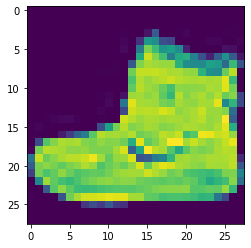

In [16]:
plt.imshow(train_data.data[0])

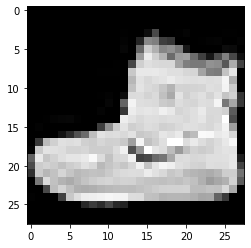

In [17]:
plt.imshow(train_data.data[0], cmap='gray')

(-0.5, 27.5, 27.5, -0.5)

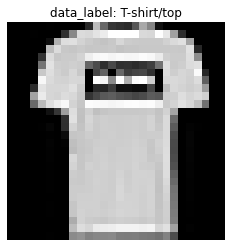

In [8]:
idx=1
plt.imshow(train_data.data[idx], cmap="gray")
#label_map_with_val_key[train_data.targets[idx].item()]
plt.title(f"data_label: {label_map_with_val_key[train_data.targets[idx].item()]}")
plt.axis("off")

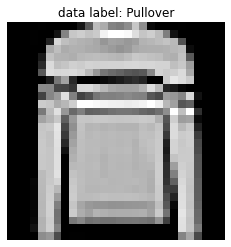

In [9]:
def view_sample_img(data, idx, label_map):
    plt.imshow(data.data[idx], cmap="gray")
    plt.title(f"data label: {label_map[data.targets[idx].item()]}")
    plt.axis("off")
view_sample_img(train_data, 5, label_map_with_val_key)

KeyError: 0

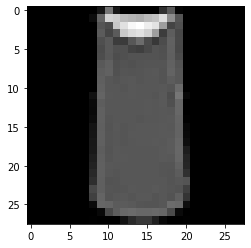

In [35]:
plt.imshow(train_data.data[2], cmap="gray")
#given_label_map[train_data.targets[2].item()]
label_map_with_key_val[train_data.targets[2].item()]

# Create the DataLoader

In [10]:
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)
"""
DataLoader creates an iterator->so we can iterate over the train_data_loader one by one
"""
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False# Normally we dont shuffle the test_data
)

In [11]:
for images, labels in test_data_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [43]:
images

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [44]:
# Acces the first batch
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [45]:
images[0].shape

torch.Size([1, 28, 28])

In [46]:
images[1].shape

torch.Size([1, 28, 28])

TypeError: Invalid shape (1, 28, 28) for image data

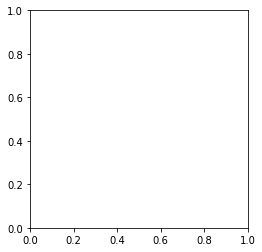

In [12]:
plt.imshow(images[0])

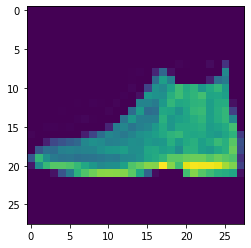

In [13]:
plt.imshow(images[0].permute(1,2,0))

In [23]:
images[0].squeeze().shape

torch.Size([28, 28])

In [53]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

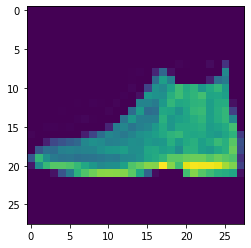

In [52]:
plt.imshow(images[0].squeeze())

In [61]:
images[0].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape#[1,1,28,28]->1->batch size, 1->channel, 28,28->image size->row and column

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [55]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [56]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [58]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [60]:
images[0][0].shape

torch.Size([28, 28])

# Lets define CNN Architecture 

In [25]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        self.conv_pool_01=nn.Sequential(
            nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_pool_02=nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.Flatten=nn.Flatten()
        self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
        self.FC_02=nn.Linear(in_features=128, out_features=64)
        self.FC_03=nn.Linear(in_features=64, out_features=out_)
    def forward(self, X):
        X=self.conv_pool_01(X)
        X=self.conv_pool_02(X)
        X=self.Flatten(X)
        X=F.relu(self.FC_01(X))
        X=F.relu(self.FC_02(X))
        X=F.relu(self.FC_03(X))
        return X
       

In [26]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


# Acces any layer from model
1. model.Flatten

In [71]:
model.conv_pool_01

Sequential(
  (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [75]:
#next(model.parameters()).is_cuda

False

In [74]:
#model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

# Checking how many parameters are trainable

In [16]:
#from pyparsing.core import ParseAction
def count_parameters(model):
    model_params={"Modules":list(), "Parameters":list()}
    total={"trainable": 0, "non_trainable": 0}
    for name, parameters in model.named_parameters():
    #Checking if the model parameters requires gradient or not
    #Required_grad means its trinble parameters, if nots then continue
        if not parameters.requires_grad:
            total["non_trainable"] +=params
            continue
        param=parameters.numel()
        model_params["Modules"].append(name)
        model_params["Parameters"].append(parameters)
        total["trainable"] +=param
    #df=pd.DataFrame(model_params)
    print(f"Total trainable parameters: {total}")
    return model_params
count_parameters(model)

Total trainable parameters: {'trainable': 45226, 'non_trainable': 0}


{'Modules': ['conv_pool_01.0.weight',
  'conv_pool_01.0.bias',
  'conv_pool_02.0.weight',
  'conv_pool_02.0.bias',
  'FC_01.weight',
  'FC_01.bias',
  'FC_02.weight',
  'FC_02.bias',
  'FC_03.weight',
  'FC_03.bias'],
 'Parameters': [Parameter containing:
  tensor([[[[-0.0384,  0.1305, -0.1538, -0.0288,  0.0756],
            [-0.0907, -0.0852,  0.1814,  0.0152, -0.1698],
            [ 0.0078,  0.0163, -0.0408,  0.0446,  0.1275],
            [ 0.0547, -0.0411, -0.0376,  0.1223, -0.1163],
            [-0.0721,  0.0393, -0.1638,  0.0572,  0.1068]]],
  
  
          [[[ 0.0470,  0.1653,  0.0014,  0.0151, -0.0185],
            [ 0.1172,  0.0611,  0.0997,  0.1894, -0.0214],
            [-0.0023, -0.0367,  0.0797, -0.0034,  0.0157],
            [-0.0781,  0.1461, -0.1518, -0.0506, -0.1981],
            [ 0.0873, -0.0775, -0.1917, -0.1879, -0.1054]]],
  
  
          [[[ 0.1625, -0.1683,  0.1331, -0.0222,  0.1559],
            [ 0.0056,  0.0105, -0.1811, -0.0251, -0.1230],
            [ 0.1070

# Training loop

In [30]:
criterion=nn.CrossEntropyLoss()# Loss function
optimizer=torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

In [31]:
len(train_data_loader)# steps per epochs

1875

In [32]:
for epoch in range(config.EPOCH):
    with tqdm(train_data_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch {epoch +1}/{config.EPOCH}")
            #put the images into device
            images=images.to(config.DEVICE)
            labels=labels.to(config.DEVICE)
            # Forward pass
            outputs=model(images)
            loss=criterion(outputs, labels)## passing the predicted and target value
            #Backward propagations
            optimizer.zero_grad()
            loss.backward()# Claculate the gradient first of all
            optimizer.step()# after calculating thegradient updates the weight with optimizer
            tqdm_epoch.set_postfix(loss=loss.item())

Epoch 10/10: 100%|███████████████████████████████████| 1875/1875 [01:00<00:00, 30.78it/s, loss=1.18]
